In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

(1727, 7)
  Buying  Maint Doors Persons Lug_boot Safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


/var/folders/8l/txtmwrwx5fs5rvykj95qzxsc0000gn/T/ipykernel_9663/663640593.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class", data=mycar, palette="flare")


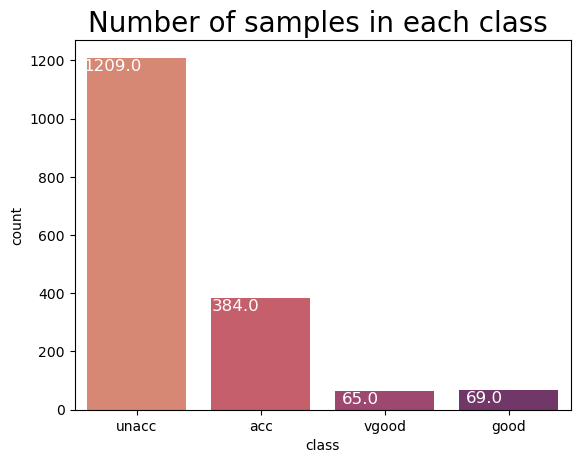

In [ ]:
#Load the dataset into dataframe
mycar = pd.read_csv('Car Evaluation Week 4 Lab.csv')

# view dimensions of dataset
print(mycar.shape)
# preview the dataframe
mycar.head()
'''
Rename column names: give proper column name 
'''
col_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety','class']
mycar.columns = col_names
#  preview the dataframe
print(mycar.head())
#Check the number of missing values
mycar.isnull().sum()

#mycar['class'].value_counts()  
X = #input/feature vector
y = #target


# counting values of variables in 'diagnosis'
ax = sns.countplot(x="class", data=mycar, palette="flare")
ax.set_title('Number of samples in each class ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

In [ ]:
#Task Two 
print(pd.crosstab(mycar['class'], mycar.Persons))
sns.catplot(data=mycar, x='Persons', hue='class', kind="count")
# Crosstab and barplot of safety by class
print(pd.crosstab(******)
sns.catplot(data=*****, x='Safety', hue='****', kind="****")


In [ ]:
#Task 3
# Subset dataset into input and output attributes
X = mycar[['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']]
y = mycar[['class']]
nrows, ncols = mycar.shape

encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'])
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = *******

In [ ]:
#Task 4
# Chi-squared feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = *****
X_test_fs = *****

# Scores for each feature
print('Feature scores using Chi-square: ','\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[*****]))
# Plot scores
labels = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']
fig, ax = *****
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.*****))], fs.scores_,tick_label=*****)

In [ ]:
#Task 5 Data import and Exploartion
#Import dataset
BC_df = pd.read_csv('breast_cancer.csv')
BC_df.head()
print("Cancer data set dimensions : {}".format(BC_df.shape))

#Missing or Null Data points
BC_df.isnull().*****
BC_df.*****

# show summary statistics
#print(BC_df.describe())

# counting values of variables in 'diagnosis'
ax = sns.countplot(x="diagnosis", data=*****, palette="flare")
ax.set_title('Number of samples in each class (M: Malignant, B: Benign )', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.*****

In [ ]:
#Task 6 Data Prepration
# Set the input (X) and output/target (y) 
X = BC_df.iloc[:, 1:31].values 
y = BC_df.iloc[:, 31].values

#Encoding categorical data values
labelencoder_y = *****
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(*****)

In [ ]:
#Task 7 ANOVA FEATURE SELECTION
# Ranking of all features based on ANOVA F-scores

fs = SelectKBest(score_func=f_classif, k=30) 
fs.fit(X_train,*****)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.*****

fs_score_df=pd.DataFrame()
feature_no=0
feature_score=0
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    fs_score_df = fs_score_df.append({feature_no:i,feature_score:fs.scores_[i]}, ignore_index=True)
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


fs_score_df['Feature Name']=BC_df.columns[1:31]
fs_score_df.rename( columns={0:'Score'}, inplace=True )
fs_score_df=fs_score_df.sort_values(by=['Score'], ascending=False)
fs_score_df # Feature ranking based on ANOVA Feature selection